# Melanoma Regression Case Study

## Library Imports

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Pre-processing Data

In [2]:
rawData = pd.read_csv("train.csv")

modData = rawData.drop(columns = ["mass_npea", "size_npear", "malign_ratio"])
modData.columns = ["Damage Size", "Exposed Area", "Malignancy Standard Deviation", "Malignancy Error", "Malignancy Penalty", "Damage Ratio", "Tumor Size"]
modData.head()

,Damage Size,Exposed Area,Malignancy Standard Deviation,Malignancy Error,Malignancy Penalty,Damage Ratio,Tumor Size
0,51.8298,988829.407,109.487,2758.76,72,39.3620,14.103
1,223.5500,2058426.301,248.881,5952.53,240,22.0253,2.648
2,127.3370,1434676.100,160.093,4635.26,73,29.9963,1.688
3,155.4400,1812195.183,173.015,5273.87,32,28.1354,3.796
4,85.1237,1043917.501,124.414,3263.35,57,35.0200,18.023


<AxesSubplot:>

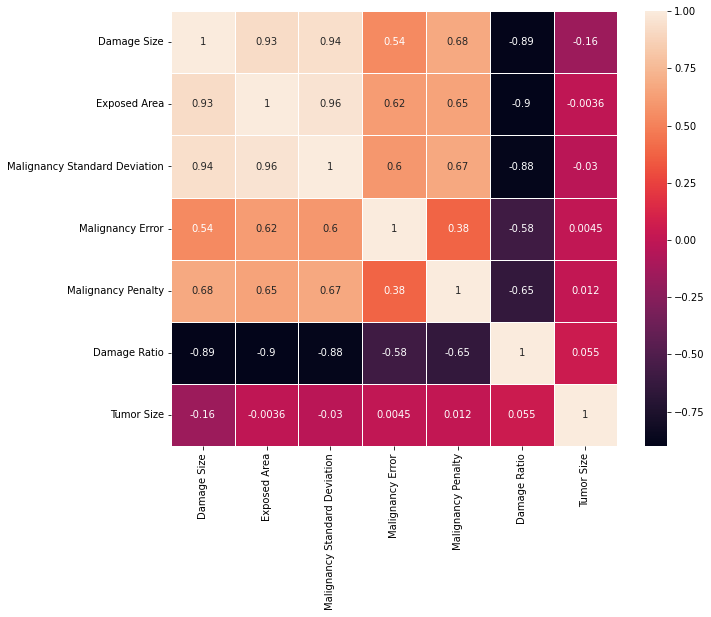

In [3]:
zeroVal = ["Damage Size", "Exposed Area"]
for column in zeroVal:
    mean = int(modData[column].mean(skipna = True))
    modData[column] = modData[column].replace(0, mean)

fig, axis = plt.subplots(figsize = (10,8))
sns.heatmap(data = modData.corr(), annot = True, linewidths = 0.5)

## Splitting and Scaling Dataset

In [4]:
# 20% test, 80% train

x = modData.drop(columns = ["Tumor Size"]).values
y = modData['Tumor Size'].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 41)

scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

## Regression Models

In [5]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

### Support Vector Machines (SVM)

R2 Score: 0.23
Mean Squared Error:  27.57
Mean Absolute Error:  4.04


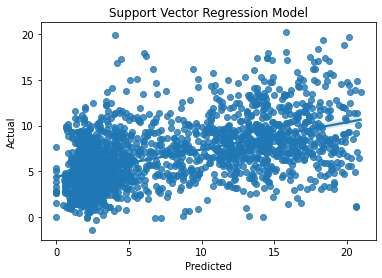

In [6]:
rg = SVR()

rg.fit(xTrain, yTrain)
predictedTest = rg.predict(xTest)

sns.regplot(x = yTest, y = predictedTest)
plt.title("Support Vector Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

r2 = r2_score(yTest, predictedTest)
print('R2 Score:', round(r2, 2))

mse = mean_squared_error(yTest, predictedTest)
print("Mean Squared Error: ", round(mse, 2))

mae = mean_absolute_error(yTest, predictedTest)
print("Mean Absolute Error: ", round(mae, 2) )

### K-Nearest Neighbours (KNN)

R2 Score: 0.49
Mean Squared Error:  18.51
Mean Absolute Error:  2.74


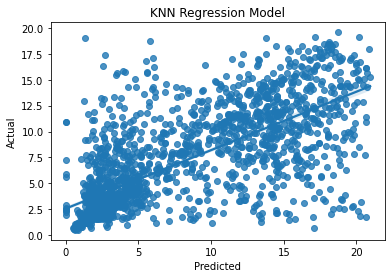

In [7]:
rg = KNeighborsRegressor(n_neighbors = 4, weights = 'distance')

rg.fit(xTrain, yTrain)
predictedTest = rg.predict(xTest)

sns.regplot(x = yTest, y = predictedTest)
plt.title("KNN Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

r2 = r2_score(yTest, predictedTest)
print('R2 Score:', round(r2, 2))

mse = mean_squared_error(yTest, predictedTest)
print("Mean Squared Error: ", round(mse, 2))

mae = mean_absolute_error(yTest, predictedTest)
print("Mean Absolute Error: ", round(mae, 2) )

### Neural Nets

R2 Score: 0.36
Mean Squared Error:  22.84
Mean Absolute Error:  3.82


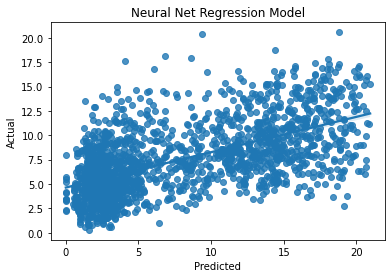

In [8]:
rg = MLPRegressor(random_state = 3, max_iter = 1000)

rg.fit(xTrain, yTrain)
predictedTest = rg.predict(xTest)

sns.regplot(x = yTest, y = predictedTest)
plt.title("Neural Net Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')

r2 = r2_score(yTest, predictedTest)
print('R2 Score:', round(r2, 2))

mse = mean_squared_error(yTest, predictedTest)
print("Mean Squared Error: ", round(mse, 2))

mae = mean_absolute_error(yTest, predictedTest)
print("Mean Absolute Error: ", round(mae, 2) )